In [26]:
import tensorflow as tf # Used for high level computations
import numpy as np

In [3]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


In [ ]:
# Creates a graph.
with tf.device('/device:GPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

In [2]:
#Data flow graphs
a=tf.add(3,5) # Graph has been created with node add and shape is scaler

In [3]:
a # It is a scalar tensor 

<tf.Tensor 'Add:0' shape=() dtype=int32>

In [5]:
#To get the value of a we need to create a session
sess=tf.Session() # Take up all the resources to run computations in a graph
print(sess.run(a)) # it will look back and see what is required to compute the value of a
sess.close() # release all the resources

8


In [6]:
# Instead of doing sess.close we can use with statement so with that
# it automatically close
with tf.Session() as sess:
    print(sess.run(a))

8


In [9]:
x=2
y=3

op1=tf.add(x,y)
op2=tf.multiply(x,y)
op3=tf.pow(op1,op2)
with tf.Session() as sess:
    op3=sess.run(op3)

In [11]:
op3

15625

In [12]:
x=2
y=3

op1=tf.add(x,y)
op2=tf.multiply(x,y)
useless=tf.multiply(x,op1)
op3=tf.pow(op1,op2)
with tf.Session() as sess:
    op3,not_use=sess.run([op3,useless]) #tf.Session.run(fetches,feed_dict=None,options=None,run_metadata=None)

In [13]:
not_use

10

In [ ]:
# Creating our own graph rather than using default graph
g=tf.graph()
# To add operators to the graph set it default
with g.as_default():
    x = tf.add(3, 5)

#Creating a session to run the graph
sess = tf.Session(graph=g)
with tf.Session() as sess:
    sess.run(x)

In [8]:
g1=tf.get_default_graph()
with g1.as_default():
    a = tf.constant(5)
with tf.Session() as sess:
    print(sess.run(a))

5


In [10]:
# First Addition program and visualization
a=tf.constant(3)
b=tf.constant(5)
c=tf.add(a,b)
with tf.Session() as sess:
    print(sess.run(c))

8


In [12]:
#Visualization
a=tf.constant(3,name='a')
b=tf.constant(5, name='b')
c=tf.add(a,b,name='add')
with tf.Session() as sess:
    # add a line to use tensorboard
    writer=tf.summary.FileWriter('./graphs',sess.graph)
    print(sess.run(c))
writer.close() # close the writer when done using it

8


In [17]:
a=tf.constant(2,shape=(2,2),name='matrix',verify_shape=False)
tf.InteractiveSession()

In [18]:
a.eval()

array([[2, 2],
       [2, 2]])

In [21]:
a=tf.constant([2,2],name='a')
b=tf.constant([[3,5],[3,2]],name='b')
x=tf.add(a,b,name='add')
y=tf.multiply(a,b,name="multiply")

In [23]:
x.eval()

array([[5, 7],
       [5, 4]])

In [24]:
y.eval()

array([[ 6, 10],
       [ 6,  4]])

In [26]:
a=tf.zeros([2,2],tf.int32) #tf.zeros_like(input_tensor,dtype=None,name=None,optimize=True)

In [28]:
a.eval()

array([[0, 0],
       [0, 0]])

In [29]:
#Tensorflow filled with specific value
#tf.fill(dims,value,name=None)
b=tf.fill([2,3],8)

In [31]:
b.eval()

array([[8, 8, 8],
       [8, 8, 8]])

In [2]:
#Variables
a=tf.Variable(2,name="scalar") #tf.Variable is a class which holds several constants

In [5]:
#Initialize the variables
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

In [6]:
#Initilaize subset of variable
#init=tf.global_variables_initializer([a,b],name="variable")

## Linear Regression Model

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd

In [26]:
# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook('fire_theft.xls', encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [27]:
print(book)
print(sheet)
print(data)
print(n_samples)

[[  6.2  29. ]
 [  9.5  44. ]
 [ 10.5  36. ]
 [  7.7  37. ]
 [  8.6  53. ]
 [ 34.1  68. ]
 [ 11.   75. ]
 [  6.9  18. ]
 [  7.3  31. ]
 [ 15.1  25. ]
 [ 29.1  34. ]
 [  2.2  14. ]
 [  5.7  11. ]
 [  2.   11. ]
 [  2.5  22. ]
 [  4.   16. ]
 [  5.4  27. ]
 [  2.2   9. ]
 [  7.2  29. ]
 [ 15.1  30. ]
 [ 16.5  40. ]
 [ 18.4  32. ]
 [ 36.2  41. ]
 [ 39.7 147. ]
 [ 18.5  22. ]
 [ 23.3  29. ]
 [ 12.2  46. ]
 [  5.6  23. ]
 [ 21.8   4. ]
 [ 21.6  31. ]
 [  9.   39. ]
 [  3.6  15. ]
 [  5.   32. ]
 [ 28.6  27. ]
 [ 17.4  32. ]
 [ 11.3  34. ]
 [  3.4  17. ]
 [ 11.9  46. ]
 [ 10.5  42. ]
 [ 10.7  43. ]
 [ 10.8  34. ]
 [  4.8  19. ]]
42


Prediction: 2.2875202 Actual 29.0
Prediction: 10.870159 Actual 44.0
Prediction: 17.339806 Actual 36.0
Prediction: 15.687905 Actual 37.0
Prediction: 22.817085 Actual 53.0
Prediction: 39.37189 Actual 68.0
Prediction: 28.036558 Actual 75.0
Prediction: 17.757202 Actual 18.0
Prediction: 20.092676 Actual 31.0
Prediction: 33.73707 Actual 25.0
Prediction: 12.669668 Actual 34.0
Prediction: 1.4016964 Actual 14.0
Prediction: 3.6137173 Actual 11.0
Prediction: 1.596906 Actual 11.0
Prediction: 2.1927109 Actual 22.0
Prediction: 3.6898482 Actual 16.0
Prediction: 6.163077 Actual 27.0
Prediction: 2.87333 Actual 9.0
Prediction: 10.45455 Actual 29.0
Prediction: 25.300695 Actual 30.0
Prediction: 34.374092 Actual 40.0
Prediction: 34.010284 Actual 32.0
Prediction: -0.15182364 Actual 41.0
Prediction: 464.1319 Actual 147.0
Prediction: 83.044464 Actual 22.0
Prediction: 22.374348 Actual 29.0
Prediction: 22.081924 Actual 46.0
Prediction: 11.142866 Actual 23.0
Prediction: 5.82037 Actual 4.0
Prediction: 29.363056 A

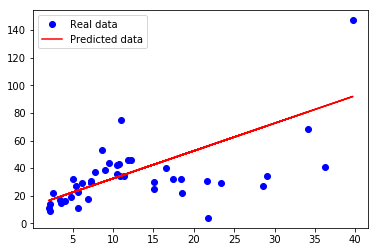

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

# Step 1: read in data from the .xls file
book = xlrd.open_workbook('fire_theft.xls', encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

    # Step 8: train the model
    for i in range(50): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
            prediction=sess.run(Y_predicted,feed_dict={X:x})
            print("Prediction:",prediction,"Actual",y)
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        print(total_loss)

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [3]:
np.random.seed(0)
tf.set_random_seed(0)

In [4]:
rand_a=np.random.uniform(0,100,(5,5))
rand_a

array([[54.88135039, 71.51893664, 60.27633761, 54.4883183 , 42.36547993],
       [64.58941131, 43.75872113, 89.17730008, 96.36627605, 38.34415188],
       [79.17250381, 52.88949198, 56.80445611, 92.55966383,  7.10360582],
       [ 8.71292997,  2.02183974, 83.26198455, 77.81567509, 87.00121482],
       [97.86183422, 79.91585642, 46.14793623, 78.05291763, 11.82744259]])

In [6]:
rand_b=np.random.uniform(0,100,(5,1))
rand_b

array([[57.01967704],
       [43.86015135],
       [98.83738381],
       [10.20448107],
       [20.88767561]])

In [7]:
a=tf.placeholder(tf.float32)

In [8]:
b=tf.placeholder(tf.float32)

In [9]:
add_ap=a+b

In [10]:
mul_op=a*b

In [12]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    add_result=sess.run(add_ap,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    mul_result=sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[111.90103  128.5386   117.29601  111.507996  99.385155]
 [108.44956   87.61887  133.03745  140.22644   82.2043  ]
 [178.00989  151.72688  155.64185  191.39705  105.940994]
 [ 18.917412  12.226321  93.46647   88.02016   97.205696]
 [118.74951  100.80353   67.035614  98.9406    32.71512 ]]
[[3129.317    4077.9866   3436.9373   3106.9062   2415.6658  ]
 [2832.9014   1919.2642   3911.33     4226.6396   1681.7803  ]
 [7825.203    5227.459    5614.404    9148.355     702.1018  ]
 [  88.91093    20.631826  849.6454    794.0686    887.80225 ]
 [2044.1062   1669.2565    963.92316  1630.3441    247.04778 ]]


In [13]:
n_features=10
n_dense_neurons=3

In [15]:
x=tf.placeholder(tf.float32,shape=(None,n_features)) #(Number of samples,Number of features)

In [16]:
w=tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b=tf.Variable(tf.ones([n_dense_neurons]))

In [17]:
xw=tf.matmul(x,w)
z=tf.add(xw,b)

In [18]:
a=tf.sigmoid(z)

In [19]:
init=tf.global_variables_initializer()

In [20]:
np.random.random([1,n_features])

array([[0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
        0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236]])

In [22]:
with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [24]:
layer_out

array([[0.90143275, 0.19683698, 0.5674319 ]], dtype=float32)